In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import sympy as sp

In [4]:
import pandas as pd

In [5]:
import math

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.svm import SVC

In [9]:
from ipywidgets import interact

In [10]:
import seaborn as sns

In [11]:
sns.set()

### 鳶尾花

In [12]:
from sklearn.datasets import load_iris

In [23]:
iris_dataset = load_iris()

In [27]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

In [26]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [28]:
x = iris_dataset.data
y = iris_dataset.target

In [31]:
X = x[:,(2,3)] # 取 pental length & pental width 作為訓練資料
Y = y

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

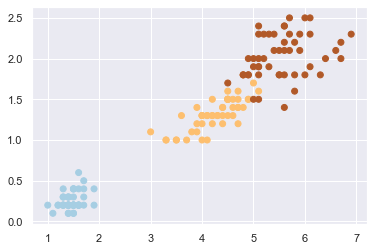

In [33]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')
plt.show()

#### 建立函數機

In [38]:
model = LinearRegression()
clf = SVC(gamma='auto')

#### 訓練

In [41]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 預測

In [47]:
y_predict_clf = clf.predict(x_test)

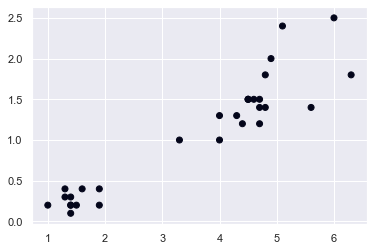

In [50]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict_clf-y_test)
plt.show()

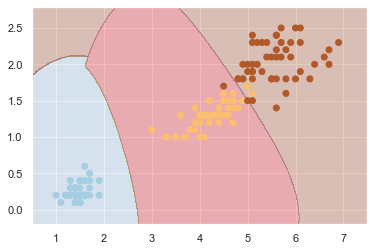

In [54]:
x0 = np.arange(0.5, 7.5, 0.01)
y0 = np.arange(-0.2, 2.8, 0.01)

xm, ym = np.meshgrid(x0, y0)
predict = np.c_[xm.ravel(), ym.ravel()] # np collection
z = clf.predict(predict)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap='Paired', alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

plt.show()